## Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

### Help function

In [2]:
def rmse(target, pred):
    return np.sqrt(mean_squared_error(target, pred))

def computeCost(X, y, w):
    y_hat = X @ (w)
    cost = ((y_hat - y)**2).mean() / 2
    return cost

### Linear Regression from scratch implementation

In [3]:
def linear_regrssion_one_var(X, y, alpha, iterations, eps=1e-6):
    return linear_regression_nomatrix(X, y, alpha, iterations, eps)

def linear_regrssion_two_var(X, y, alpha, iterations, eps=1e-6):
    return linear_regression_nomatrix(X, y, alpha, iterations, eps)

def linear_regression_nomatrix(X, y, alpha, iterations, eps=1e-6):
    m, n = X.shape
    w = np.zeros(n)
    grad = np.zeros(n)
    cost = np.zeros(iterations)
    
    cost[0] = computeCost(X, y, w)
    for n_iter in np.arange(1, iterations):    
        y_hat = X @ (w)
        err = y_hat - y
        
        # compute grad for each feature
        for i in range(n):
            grad[i] = np.sum(err * X[:, i]) / m 
        w = w - alpha * grad
        
        cost[n_iter] = computeCost(X, y, w)
        #print('cost[%4d]: %.8f' % (n_iter, cost[n_iter]))
        if np.abs(cost[n_iter - 1] - cost[n_iter]) < eps:
            cost = cost[:n_iter]
            break
    
    return w, cost

### Normal Equation implementation

In [4]:
def normalEquation(X, y):
    XtX = X.T @ (X)
    XtX_inv = np.linalg.inv(XtX)    
    Xty = X.T @ (y)
    w = XtX_inv @ (Xty)
    
    return w

### Linear regression multi-variable matrix implementation

In [5]:
def linear_regression_multi(X, y, alpha, iterations, eps=1e-6):
    m = len(y)
    w = np.zeros(X.shape[1])
    
    cost = np.zeros(iterations)
    cost[0] = computeCost(X, y, w)
    for n_iter in np.arange(1, iterations):   
        
        y_hat = X @ (w)
        err = y_hat - y
        grad = X.T @ (err) / m
        
        w = w - alpha * grad
        
        cost[n_iter] = computeCost(X, y, w)
        #if n_iter % 50 == 0:
        #    print('cost[%4d]: %.8f' % (n_iter, cost[n_iter]))
        if np.abs(cost[n_iter - 1] - cost[n_iter]) < eps:
            cost = cost[:n_iter]
            break
    
    return w, cost

## 1. Linear regression with one variable from scratch

In [6]:
df = pd.read_csv('ex1data1.csv', names=['population_of_city' ,'food_truck_profit'])
df.head()

,population_of_city,food_truck_profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Visualize data

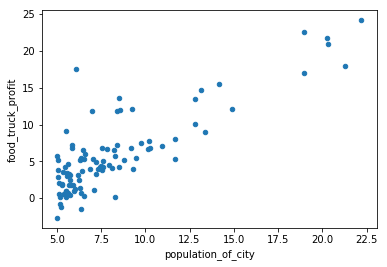

In [7]:
df.plot.scatter(x='population_of_city', y='food_truck_profit')

In [8]:
# prepare data
df = pd.read_csv('ex1data1.csv', names=['population_of_city' ,'food_truck_profit'])
X, y = df.iloc[:, 0].values, df.iloc[:, -1].values

# add bias term for X 
bias = np.ones([len(y), 1])
X = X.reshape([-1, 1])
X = np.hstack([bias, X])

In [9]:
learning_rates = [np.power(10.0, p) for p in np.arange(-2, -6, -1)]
for alpha in learning_rates:
    w, cost = linear_regrssion_one_var(X, y, alpha, 5000)
    y_pred = X @ (w)
    print('\n------------------------------------------------------------------')
    print('Weights:', w.ravel())
    print("RMSE(gd one var, alpha: %.e, iters: %4d): %.4f, cost: %.4f" % (alpha, len(cost), rmse(y, y_pred), cost[-1]))


------------------------------------------------------------------
Weights: [-3.84072806  1.18750299]
RMSE(gd one var, alpha: 1e-02, iters: 2372): 2.9924, cost: 4.4772

------------------------------------------------------------------
Weights: [-2.28139507  1.03085108]
RMSE(gd one var, alpha: 1e-03, iters: 5000): 3.0706, cost: 4.7142

------------------------------------------------------------------
Weights: [-0.2628458   0.82806591]
RMSE(gd one var, alpha: 1e-04, iters: 5000): 3.3700, cost: 5.6785

------------------------------------------------------------------
Weights: [0.04276212 0.78423779]
RMSE(gd one var, alpha: 1e-05, iters: 5000): 3.4343, cost: 5.8971


## 2. Linear regression with two variables from scratch

In [10]:
df = pd.read_csv('ex1data2.csv', names=['house_size', 'bedrooms_num', 'house_price'])
df.head()

,house_size,bedrooms_num,house_price
0,2104,3,399900.0
1,1600,3,329900.0
2,2400,3,369000.0
3,1416,2,232000.0
4,3000,4,539900.0


### Visualize data correlation

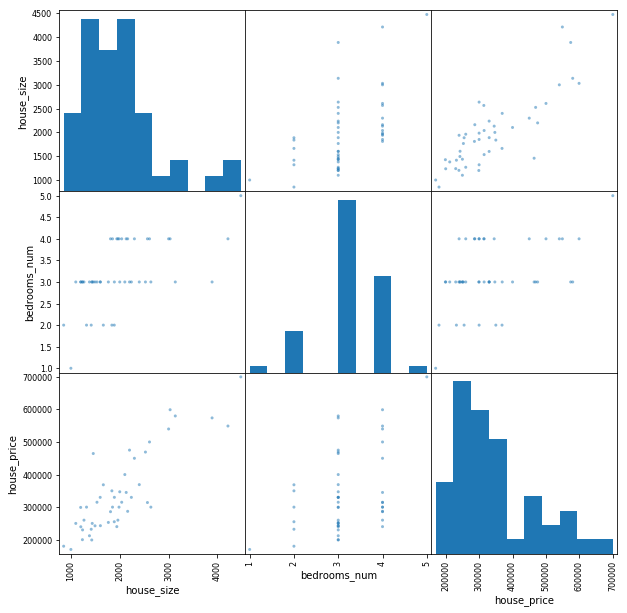

In [11]:
# plot scatter matrix to visualize correlation between attribute
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(10, 10))
plt.show()

In [12]:
# prepare data
df = pd.read_csv('ex1data2.csv', names=['house_size', 'bedrooms_num', 'house_price'])
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

# normalize 
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)

# add bias term for X 
bias = np.ones([len(y), 1])
X_norm = np.hstack([bias, X_norm])

/Users/tsungmin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
learning_rates = [np.power(10.0, p) for p in np.arange(-2, -6, -1)]
for alpha in learning_rates:
    w, cost = linear_regrssion_two_var(X_norm, y, alpha, 5000)
    y_pred = X_norm @ (w)
    print('\n------------------------------------------------------------------')
    print('Weights:', w.ravel())
    print("RMSE(gd two var, alpha: %.e, iters: %4d): %.4f cost: %.4f" %
          (alpha, len(cost), rmse(y, y_pred), cost[-1]))


------------------------------------------------------------------
Weights: [340412.76595744 109447.74413032  -6578.25540162]
RMSE(gd two var, alpha: 1e-02, iters: 3359): 63926.2149 cost: 2043280477.3928

------------------------------------------------------------------
Weights: [ 3.38122523e+05  1.03000094e+05 -1.72570940e+02]
RMSE(gd two var, alpha: 1e-03, iters: 5000): 64250.7299 cost: 2064078148.2578

------------------------------------------------------------------
Weights: [133926.49986917  39309.53903424  16398.69652625]
RMSE(gd two var, alpha: 1e-04, iters: 5000): 224422.8264 cost: 25182802501.1442

------------------------------------------------------------------
Weights: [16598.96931827  5120.84008601  2596.44851018]
RMSE(gd two var, alpha: 1e-05, iters: 5000): 344729.2419 cost: 59419125098.6200


## Linear regression with two variables using matrix

In [14]:
# prepare data
df = pd.read_csv('ex1data2.csv', names=['house_size', 'bedrooms_num', 'house_price'])
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

# normalize 
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)

# add bias term for X 
bias = np.ones([len(y), 1])
X_norm = np.hstack([bias, X_norm])

/Users/tsungmin/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [15]:
learning_rates = [np.power(10.0, p) for p in np.arange(-2, -6, -1)]
for alpha in learning_rates:
    w, cost = linear_regression_multi(X_norm, y, alpha, 5000)
    y_pred = X_norm @ (w)
    print('\n------------------------------------------------------------------')
    print('Weights:', w.ravel())
    print("RMSE(gd two var, alpha: %.e, iters: %4d): %.4f cost: %.4f" %
          (alpha, len(cost), rmse(y, y_pred), cost[-1]))


------------------------------------------------------------------
Weights: [340412.76595744 109447.74413032  -6578.25540162]
RMSE(gd two var, alpha: 1e-02, iters: 3359): 63926.2149 cost: 2043280477.3928

------------------------------------------------------------------
Weights: [ 3.38122523e+05  1.03000094e+05 -1.72570940e+02]
RMSE(gd two var, alpha: 1e-03, iters: 5000): 64250.7299 cost: 2064078148.2578

------------------------------------------------------------------
Weights: [133926.49986917  39309.53903424  16398.69652625]
RMSE(gd two var, alpha: 1e-04, iters: 5000): 224422.8264 cost: 25182802501.1442

------------------------------------------------------------------
Weights: [16598.96931827  5120.84008601  2596.44851018]
RMSE(gd two var, alpha: 1e-05, iters: 5000): 344729.2419 cost: 59419125098.6200


## Linear regression with two variables using Normal equation

In [16]:
# Drop unnamed feature in X
df = pd.read_csv('ex1data2.csv', names=['house_size', 'bedrooms_num', 'house_price'])
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# add bias term for x
bias = np.ones([len(y), 1])
X = np.hstack([bias, X])

In [17]:
w = normalEquation(X, y)

# predict 
y_pred = X @ (w)
print('Weights:', w.ravel())
print("RMSE(Normal Equation): %.4f cost: %.4f" % (rmse(y[:], y_pred[:]), computeCost(X, y, w)))

Weights: [89597.765961     139.21063465 -8737.91542019]
RMSE(Normal Equation): 63926.2149 cost: 2043280477.3926


## 3. Linear regression with multiple variables



In [18]:
df = pd.read_csv('ex1data3.csv')
df.head()

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Linear regression with multiple variables

In [19]:
# Drop unnamed feature in X
df = pd.read_csv('ex1data3.csv')
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# Normalize with Std
scalar = StandardScaler()
scalar.fit(X)
X_norm = scalar.transform(X)

# add bias term for X_norm
bias = np.ones([len(y), 1])
X_norm = np.hstack([bias, X_norm])

In [20]:
learning_rates = [np.power(10.0, p) for p in np.arange(-1, -6, -1)]
for alpha in learning_rates:
    w, cost = linear_regression_multi(X_norm, y, alpha, 3000)
    y_pred = X_norm @ (w)
    print('\n------------------------------------------------------------------')
    print('Weights:', w.ravel())
    print("RMSE(gd multi var, alpha: %.e, iters: %4d): %.4f cost: %.4f" % 
          (alpha, len(cost), rmse(y, y_pred), cost[-1]))


------------------------------------------------------------------
Weights: [ 2.06855817  0.83923037  0.12309659 -0.27892925  0.31468715 -0.00304713
 -0.03989874 -0.85918718 -0.83073106]
RMSE(gd multi var, alpha: 1e-01, iters:  486): 0.7242 cost: 0.2623

------------------------------------------------------------------
Weights: [ 2.06855817e+00  8.43328287e-01  1.33184975e-01 -2.69239682e-01
  2.99008569e-01  5.69688690e-04 -4.08395229e-02 -7.81797829e-01
 -7.52975352e-01]
RMSE(gd multi var, alpha: 1e-02, iters: 3000): 0.7253 cost: 0.2630

------------------------------------------------------------------
Weights: [ 1.96562225  0.73892869  0.18314281  0.03222339 -0.0267998   0.01075899
 -0.03909961 -0.23415434 -0.18704297]
RMSE(gd multi var, alpha: 1e-03, iters: 3000): 0.7884 cost: 0.3108

------------------------------------------------------------------
Weights: [ 0.53600232  0.20376229  0.03531651  0.03907652 -0.01633949 -0.00615532
 -0.00760765 -0.04361201 -0.01820498]
RMSE(gd mu

## Linear regression with multiple variables using Normal equation

In [21]:
# Drop unnamed feature in X
df = pd.read_csv('ex1data3.csv')
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# add bias term for x
bias = np.ones([len(y), 1])
X = np.hstack([bias, X])

In [22]:
w = normalEquation(X, y)

# predict 
y_pred = X @ (w)
print('Weights:', w.ravel())
print("RMSE(Normal Equation): %.4f cost: %.4f" % (rmse(y, y_pred), computeCost(X, y, w)))

Weights: [-3.69419202e+01  4.36693293e-01  9.43577803e-03 -1.07322041e-01
  6.45065694e-01 -3.97638942e-06 -3.78654266e-03 -4.21314378e-01
 -4.34513755e-01]
RMSE(Normal Equation): 0.7241 cost: 0.2622


## Linear regression with multiple variables using scikit-learn linear regression model

In [23]:
from sklearn import datasets, linear_model

In [24]:
# Drop unnamed feature in X
df = pd.read_csv('ex1data3.csv')
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [25]:
# build linear regression model
lr = linear_model.LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

In [26]:
# The mean squared error
w = np.zeros(X.shape[1] + 1)
w[0] = lr.intercept_
w[1:] = lr.coef_
print('Weights:', w.ravel())
print("RMSE(scikit-learn linear model): %.4f cost: %.4f" % (rmse(y, y_pred), ((y_pred - y)**2).mean()/2))

Weights: [-3.69419202e+01  4.36693293e-01  9.43577803e-03 -1.07322041e-01
  6.45065694e-01 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01
 -4.34513755e-01]
RMSE(scikit-learn linear model): 0.7241 cost: 0.2622


## Linear regression with multiple variables using TensorFlow

In [27]:
import tensorflow as tf

/Users/tsungmin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [28]:
# Drop unnamed feature in X
df = pd.read_csv('ex1data3.csv')
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
y = np.reshape(y, [-1, 1])

# Normalize with Std
scalar = StandardScaler()
scalar.fit(X)
X_norm = scalar.transform(X)

# add bias term for X_norm
bias = np.ones([len(y), 1])
X_norm = np.hstack([bias, X_norm])

### Prepare parameters for tensorflow

In [29]:
m, n = X_norm.shape
iterations = 3000
eps = 1e-6

# linear regression variables
X_ = tf.placeholder(tf.float32, [None, n])
y_ = tf.placeholder(tf.float32, [None, 1])
alpha_ = tf.placeholder(tf.float32)
w_ = tf.Variable(tf.zeros([n, 1]))

### Define gradient descent flow

In [30]:
# linear regression grad update step
predict_ = tf.matmul(X_, w_)
cost_ = tf.reduce_mean(tf.pow(predict_ - y_, 2)) / 2
grad_ = tf.matmul(tf.transpose(X_), predict_ - y_) / tf.cast(tf.shape(X_)[0], tf.float32)
w_update = tf.assign(w_, tf.reshape(w_ - alpha_ * grad_, [n, 1]))

In [31]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    learning_rates = [np.power(10.0, p) for p in np.arange(-1, -6, -1)]
    for alpha in learning_rates:
        feed_dict = {
            X_: X_norm, 
            y_: y,
            alpha_: alpha
        }
        ### linear regression 
        sess.run(tf.assign(w_, tf.zeros([n, 1])))
        cost = np.zeros(iterations, np.float32)
        cost[0] = sess.run(cost_, feed_dict)
        for n_iter in np.arange(1, iterations):
            _ = sess.run([w_update], feed_dict)
            cost[n_iter] = sess.run(cost_, feed_dict)
            #if n_iter % 50 == 0:
            #    cost[n_iter] = sess.run(cost_, feed_dict)
            #    print('cost[%4d]: %.8f' % (n_iter, cost[n_iter]))
            if np.abs(cost[n_iter - 1] - cost[n_iter]) < eps:
                cost = cost[:n_iter]
                break
        y_pred = sess.run(predict_, feed_dict)
        print('\n------------------------------------------------------------------')
        print('Weights:', w_.eval().ravel())
        print("RMSE(tf gradient descent, alpha: %.e, iters: %4d): %.4f cost: %.4f" % 
              (alpha, len(cost), rmse(y, y_pred), cost[-1]))


------------------------------------------------------------------
Weights: [ 2.068557    0.8394101   0.12325918 -0.27902788  0.31466272 -0.00299031
 -0.03991633 -0.85783315 -0.8293863 ]
RMSE(tf gradient descent, alpha: 1e-01, iters:  480): 0.7242 cost: 0.2623

------------------------------------------------------------------
Weights: [ 2.0685463e+00  8.4330797e-01  1.3373768e-01 -2.6816055e-01
  2.9765844e-01  7.7100657e-04 -4.0885840e-02 -7.7778834e-01
 -7.4891305e-01]
RMSE(tf gradient descent, alpha: 1e-02, iters: 2943): 0.7254 cost: 0.2631

------------------------------------------------------------------
Weights: [ 1.9656222   0.7389285   0.18314275  0.0322236  -0.02679995  0.01075899
 -0.03909966 -0.23415434 -0.18704297]
RMSE(tf gradient descent, alpha: 1e-03, iters: 3000): 0.7884 cost: 0.3108

------------------------------------------------------------------
Weights: [ 0.53600216  0.2037622   0.03531649  0.03907654 -0.01633948 -0.00615534
 -0.00760765 -0.04361201 -0.01820498